In [69]:
import pandas as pd
import numpy as np
import itertools 
import matplotlib.pyplot as plt

In [70]:
train_in = pd.read_csv("train_in.csv")
train_out = pd.read_csv("train_out.csv")
train_in = np.array(train_in)
train_out = np.array(train_out)

## 1.1

In [71]:
display(train_in)
display(train_out)
print(np.shape(train_in))
print(np.shape(train_out)) 
train_out = np.squeeze(train_out)
print(np.shape(train_out)) 

array([[-1.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       ...,
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

array([[5],
       [4],
       [7],
       ...,
       [7],
       [9],
       [8]], dtype=int64)

(1706, 256)
(1706, 1)
(1706,)


In [72]:
train_out = np.squeeze(train_out)
train_in[np.where(train_out == 0)[0],:]

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [73]:
clouds = dict()

for x in range(10):
    clouds[x] = train_in[np.where(train_out == x)[0],:]


In [74]:
means = dict()
for x in range(10):
    means[x] =  np.mean(clouds[x], axis=0)

In [75]:

distances = []
for i in range(10):
    for j in range(10):
        distances.append(np.linalg.norm(means[i]-means[j]))
distances = np.array(distances)
distances = np.reshape(distances,(10,10))

In [76]:
distances

array([[ 0.        , 14.44960797,  9.33455587,  9.14373367, 10.76984444,
         7.51929626,  8.16301949, 11.86455505,  9.90790174, 11.48887494],
       [14.44960797,  0.        , 10.12532258, 11.7332329 , 10.17378643,
        11.11880041, 10.59793273, 10.74315367, 10.08677677,  9.9320937 ],
       [ 9.33455587, 10.12532258,  0.        ,  8.17828489,  7.93254148,
         7.90679632,  7.31795234,  8.87253107,  7.07751618,  8.88774785],
       [ 9.14373367, 11.7332329 ,  8.17828489,  0.        ,  9.0876078 ,
         6.11875002,  9.29242591,  8.92240093,  7.02042489,  8.35435012],
       [10.76984444, 10.17378643,  7.93254148,  9.0876078 ,  0.        ,
         8.00151741,  8.76599667,  7.58301228,  7.38090899,  6.01040793],
       [ 7.51929626, 11.11880041,  7.90679632,  6.11875002,  8.00151741,
         0.        ,  6.68862915,  9.21195402,  6.96738648,  8.25853807],
       [ 8.16301949, 10.59793273,  7.31795234,  9.29242591,  8.76599667,
         6.68862915,  0.        , 10.8681573 

## 1.2

### PCA

In [77]:

from sklearn.decomposition import PCA

In [78]:
pd.DataFrame(train_out,)

,0
0,5
1,4
2,7
3,3
4,6
...,...
1701,8
1702,9
1703,7
1704,9


In [79]:
pca = PCA(n_components=2)

PCs = pca.fit_transform(train_in)


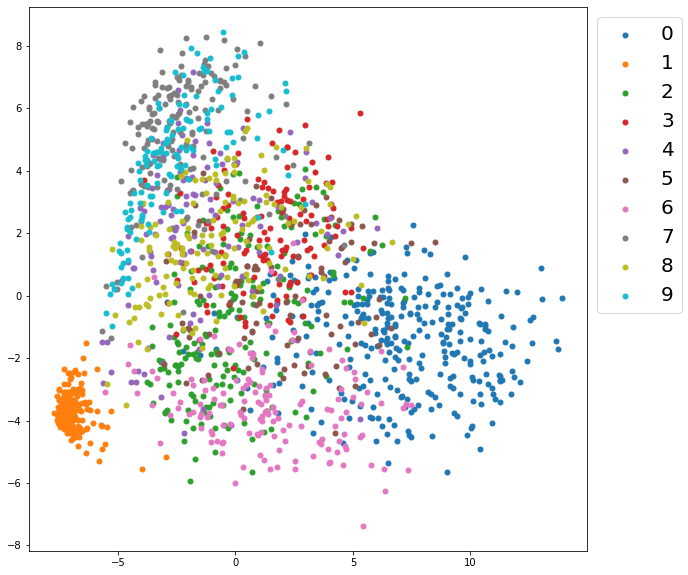

In [80]:
plt.figure(figsize=(10,10)) 

for i in range(10):
    mask = train_out == i
    plt.scatter(PCs[mask, 0], PCs[mask, 1], label=i, s=25, alpha=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=20)

### UMAP

In [81]:
import umap

In [82]:
umap = umap.UMAP()
X_u = umap.fit_transform(train_in)

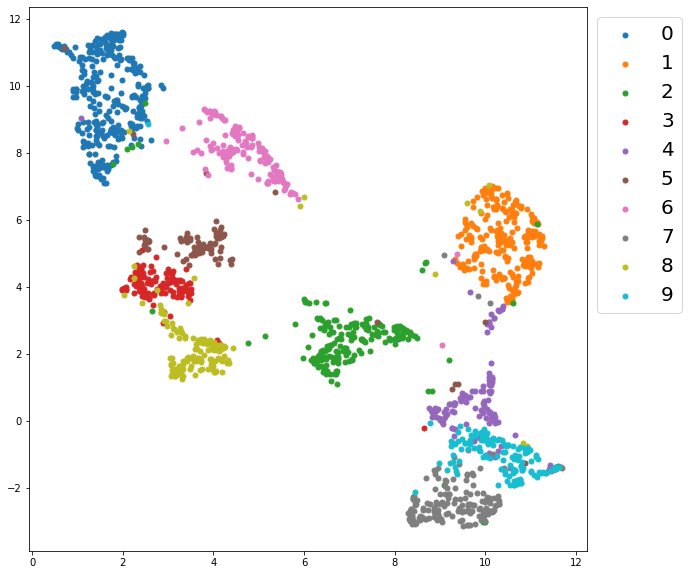

In [83]:
plt.figure(figsize=(10,10))

for i in range(10):
    mask = train_out == i
    plt.scatter(X_u[mask, 0], X_u[mask, 1], label=i, s=25, alpha=1)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=20)

### t-SNE

In [84]:
from sklearn.manifold import TSNE

In [85]:
t_sne = TSNE(n_components=2)
X_tsne = t_sne.fit_transform(train_in)

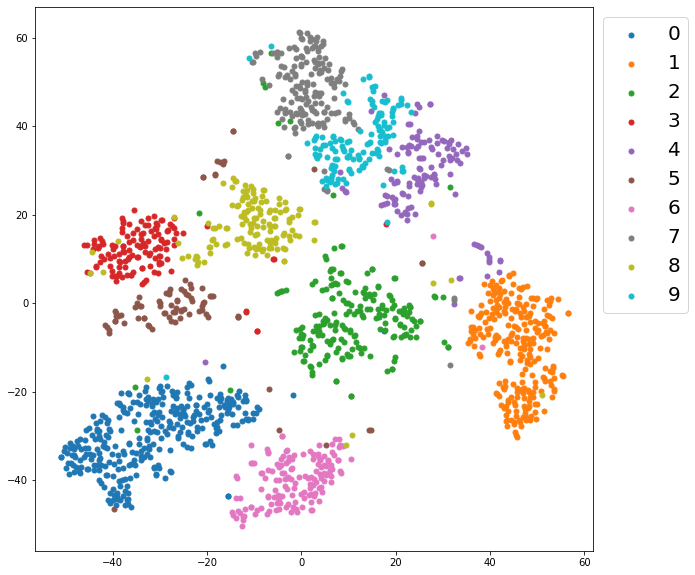

In [86]:
plt.figure(figsize=(10,10))

for i in range(10):
    mask = train_out == i
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=i, s=25, alpha=1)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=20)

## 1.3

In [88]:
Class = []
for i in train_in:
    Dis = []
    for j in range(10):
        Mean = means[j]
        dis = np.linalg.norm(Mean-i)
        Dis.append(dis)
    dis_min = np.amin(Dis)
    clas = float(np.where(Dis==dis_min)[0])
    Class.append(clas)

In [89]:
Class = np.array(Class)
diff = train_out-Class

In [90]:
success_rate = len(np.where(diff==0)[0])/len(train_out)
print(success_rate)

0.8634232121922626


In [91]:
test_in = pd.read_csv("test_in.csv")
test_out = pd.read_csv("test_out.csv")
test_in = np.array(test_in)
test_out = np.array(test_out)

In [92]:
test_out = np.squeeze(test_out, axis=1)

In [96]:
Class_test = []
for i in test_in:
    Dis = []
    for j in range(10):
        Mean = means[j]
        dis = np.linalg.norm(Mean-i)
        Dis.append(dis)
    dis_min = np.amin(Dis)
    clas = float(np.where(Dis==dis_min)[0])
    Class_test.append(clas)

In [97]:
Class_test = np.array(Class_test)
diff_test = test_out - Class_test

In [98]:
success_rate_test = len(np.where(diff_test==0)[0])/len(test_out)
print(success_rate_test)

0.8038038038038038


## 1.4

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
k = len(train_in)/10

In [102]:
knn = KNeighborsClassifier(n_neighbors=12)

In [103]:
knn.fit(train_in, train_out)
knn_out = knn.predict(test_in)

In [104]:
diff_knn = knn_out - test_out
success_rate_test = len(np.where(diff_knn==0)[0])/len(test_out)
print(success_rate_test)

0.8788788788788788


In [105]:
from sklearn.metrics import confusion_matrix
conf_m_knn = confusion_matrix(test_out, knn_out)

In [106]:
conf_m_simp = confusion_matrix(test_out, Class_test)

In [107]:
print(conf_m_knn)
print(conf_m_simp)

[[217   0   2   0   1   0   2   0   0   1]
 [  0 119   0   0   0   0   2   0   0   0]
 [  7   3  82   2   0   0   0   3   4   0]
 [  5   0   1  69   0   1   0   0   1   2]
 [  0   5   2   0  71   0   0   1   0   7]
 [  7   0   1   8   2  32   0   2   0   3]
 [  9   1   0   0   1   0  79   0   0   0]
 [  0   4   0   1   2   0   0  56   0   1]
 [  3   3   0   5   0   0   1   2  76   2]
 [  1   2   0   0   1   0   0   6   1  77]]
[[177   0   3   2   4   2  23   1  10   1]
 [  0 120   0   0   0   0   1   0   0   0]
 [  2   0  69   6   8   1   0   2  13   0]
 [  3   0   3  61   1   8   0   0   1   2]
 [  1   3   3   0  69   0   1   1   0   8]
 [  3   0   0   6   3  38   1   0   0   4]
 [  7   0   2   0   2   1  78   0   0   0]
 [  0   2   1   0   5   0   0  50   0   6]
 [  3   2   0   6   3   3   0   0  73   2]
 [  0   5   0   0   8   0   0   5   2  68]]
